In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [2]:
from json import dumps, loads, JSONEncoder

In [3]:
sns.set_theme(rc={
    "figure.figsize": (16, 9)
})

In [4]:
df = pd.read_csv("27_10_20_53.csv")

In [5]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality
0,t3_1fo8hat,"Harini Amarasuriya, feminist and outspoken adv...",t2_hwz7hlpj,682,NaN,t3_1fo8hat,Politics,1.727171e+09,1730036388,False
1,t1_loo1nty,I like the fact I am hearing a lot more Dr in ...,t2_7z9p1u76,203,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False
2,t1_loo6dk0,She's an excellent lecturer and very popular w...,t2_88sa0qyh,255,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False
3,t1_loo37mt,From the perspective of a bi-racial child of a...,t2_yhhuya1j4,135,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False
4,t1_loo9jcy,Let's hope we see some change here finally. Pe...,t2_14avw6woy3,35,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False


### Описание столбцов
1. *full_name* - Идентификатор текстовой записи (публикация или комментарий). Тип: строка.
2. *text_body* - Текстовое содержание записи, кодированное в UTF-8. Может содержать несвязный текст или текст на языке, отличном от английского. Может содержать пропуски (автор удалил аккаунт или комментарий). Тип: строка.
3. *author_name* - Идентификатор автора текстовой записи. Может содержать пропуски (автор удалил аккаунт). Тип: строка.
4. *votes* - Рейтинг записи. Тип: число.
5. *responds_to* - Идентификатор записи, на которую отвечает данная. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
6. *parent_submission_name* - Идентификатор публикации, в дереве которой находится данная запись. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
7. *submission_flair* - Категория текстовой записи. Единая для всего дерева публикации. Тип: строка
8. *created_timestamp* - UNIX метка времени создания записи по данным Reddit. Тип: число
9. *parsed_timestamp* - UNIX метка времени сохранения записи парсером. Тип: число
10. *controversiality* - Отметка о спорности публикации по данным Reddit. Тип: булев

Использованные ключевые слова:
1. 2022
2. colombo
3. cost
4. crisis
5. economic
6. galle
7. gota
8. gotabaya 
9. kohuwala
10. martial
11. mirihana
12. protest
13. rajapaksa
14. riot
15. sjb
16. storm


In [6]:
print(f"Row count: {df.shape[0]}")

print(f"Unique rows: {df["full_name"].nunique()}")
print(f"Unique authors (including null value): {df["author_name"].nunique()}")
print(f"Unique submissions (not comments): {df["parent_submission_name"].nunique()}")

Row count: 51892
Unique rows: 51892
Unique authors (including null value): 7513
Unique submissions (not comments): 922


In [7]:
df.drop_duplicates(subset="full_name", inplace=True, ignore_index=True)

In [8]:
print(f"Row count: {df.shape[0]}")

print(f"Unique rows: {df["full_name"].nunique()}")
print(f"Unique authors (including null value): {df["author_name"].nunique()}")
print(f"Unique submissions (not comments): {df["parent_submission_name"].nunique()}")

Row count: 51892
Unique rows: 51892
Unique authors (including null value): 7513
Unique submissions (not comments): 922


In [9]:
df["submission_flair"].value_counts()

submission_flair
Discussion          23021
Politics            13827
News                10747
Rumour               4035
Beaurocracy           105
Rumour Disproven      105
Name: count, dtype: int64

### Признак controversiality 

In [10]:
df["controversiality"].value_counts()

controversiality
False    49056
True      2836
Name: count, dtype: int64

In [11]:
def build_replies_up(df: pd.DataFrame, starting_node: pd.DataFrame) -> list[str]:
    out = [starting_node["text_body"]]
    next_parent = starting_node["responds_to"]

    while isinstance(next_parent, str):
        node = df[df["full_name"] == next_parent]
        out.append(node.iloc[0]['text_body'])
        next_parent = node.iloc[0]['responds_to']

    return list(reversed(out))

In [12]:
def print_replies(start_id: int) -> None:
    for i in build_replies_up(df, df.iloc[start_id]):
        print(i)
        print("="*20)

### Признак votes

In [13]:
df["votes"].describe()

count    51892.000000
mean         7.852135
std         23.030875
min       -115.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        868.000000
Name: votes, dtype: float64

<Axes: xlabel='votes', ylabel='Count'>

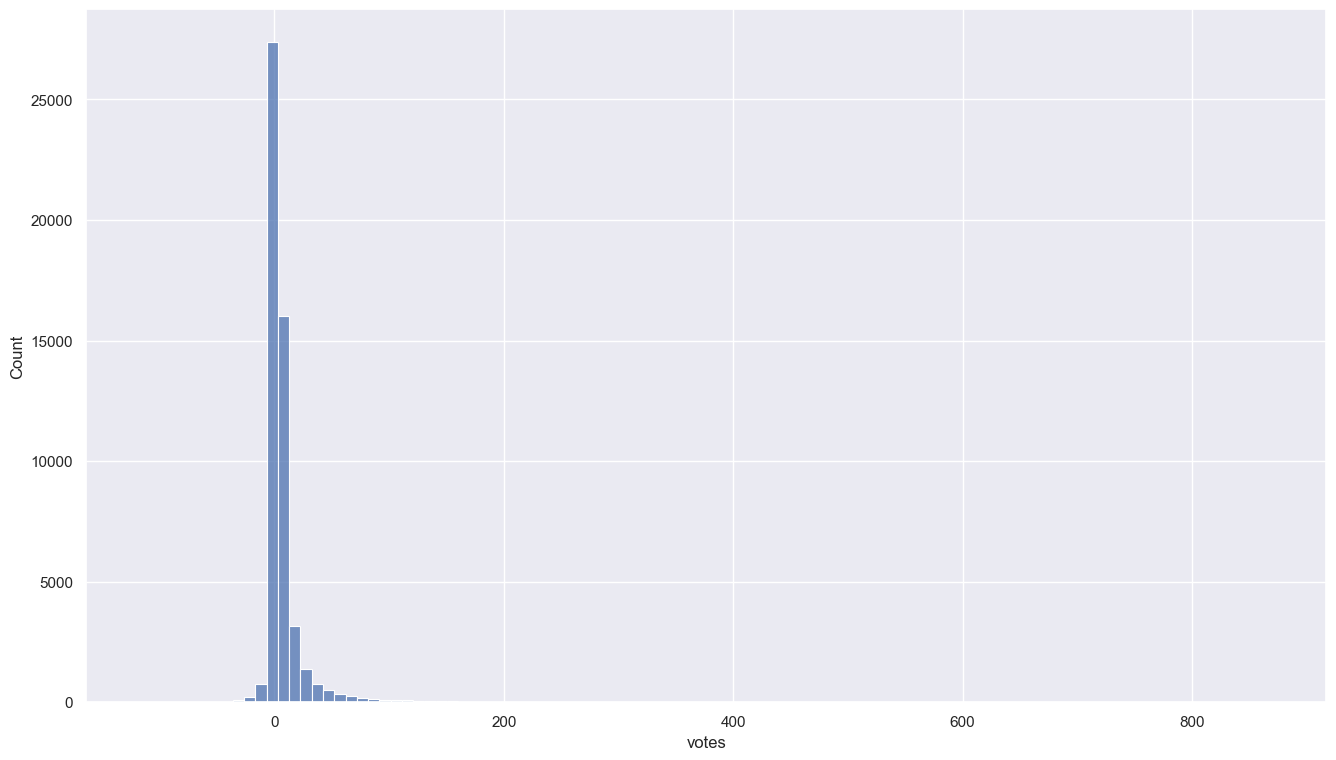

In [14]:
sns.histplot(data=df, x="votes", bins=100)

[(0.0, 100.0)]

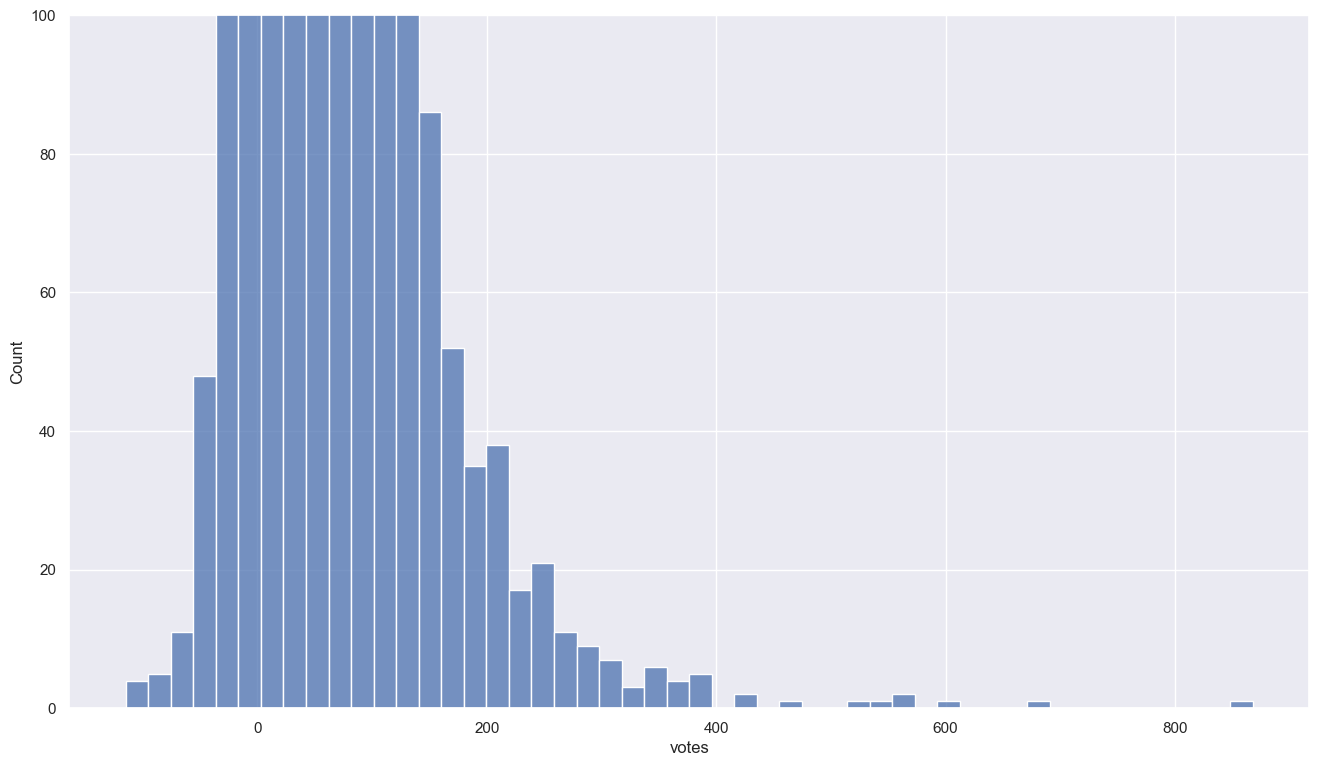

In [15]:
ax = sns.histplot(data=df, x="votes", bins=50)
ax.set(ylim=(0, 100))

In [16]:
print(f"99th quantile of votes: {df["votes"].quantile(0.99)}")

99th quantile of votes: 107.08999999999651


In [17]:
print(f"90th quantile of votes: {df["votes"].quantile(0.90)}")

90th quantile of votes: 18.0


### Признак created_timestamp

In [18]:
from datetime import datetime

In [19]:
df["created_datetime"] = df["created_timestamp"].apply(
    lambda x: datetime.fromtimestamp(x)
)

In [20]:
df["created_datetime"].min()

Timestamp('2019-04-28 12:35:08')

In [21]:
df["created_datetime"].max()

Timestamp('2024-10-27 19:32:54')

In [22]:
df["parsed_timestamp"] = df["parsed_timestamp"].apply(
    lambda x: datetime.fromtimestamp(x)
)

start = df["parsed_timestamp"].min()
finished = df["parsed_timestamp"].max()

print(finished - start)

0 days 00:12:43


In [23]:
df["year"] = df["created_datetime"].apply(
    lambda x: x.year
)

In [24]:
df.groupby("year").size()

year
2019       41
2020       44
2021      423
2022     1821
2023     6294
2024    43269
dtype: int64

In [25]:
df.groupby("year")["votes"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,41.0,6.463415,7.506989,-3.0,2.0,5.0,7.0,39.0
2020,44.0,2.272727,3.787149,-5.0,1.0,1.0,3.0,16.0
2021,423.0,6.555556,24.768332,-36.0,1.0,2.0,6.0,429.0
2022,1821.0,8.569467,22.894268,-39.0,1.0,3.0,8.0,354.0
2023,6294.0,7.167779,20.048887,-89.0,1.0,2.0,6.0,525.0
2024,43269.0,7.941159,23.439794,-115.0,1.0,2.0,6.0,868.0


In [26]:
from transformers import (
    AutoTokenizer, 
    AutoModelForTokenClassification,
    AutoModelForSequenceClassification, 
    pipeline
)

In [27]:
%env HF_HUB_DISABLE_SYMLINKS_WARNING=1

ner_name = "Babelscape/wikineural-multilingual-ner"
ner_tokenizer = AutoTokenizer.from_pretrained(ner_name)
ner_model = AutoModelForTokenClassification.from_pretrained(ner_name)
ner_pipe = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, grouped_entities=True)

env: HF_HUB_DISABLE_SYMLINKS_WARNING=1


c:\Users\artur\source\rra\venv\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [28]:
df["text_body"] = df["text_body"].fillna("")

In [29]:
df["named_entities"] = df["text_body"].progress_apply(
    lambda x: ner_pipe(x) if isinstance(x, str) else []
)

100%|██████████| 51892/51892 [1:01:14<00:00, 14.12it/s]


In [54]:
class NumpyEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.floating):
            return float(obj)
        else:
            return super(NumpyEncoder, self).default(obj)

In [31]:
df["named_entities_json"] = df["named_entities"].apply(
    lambda x: dumps(x, cls=NumpyEncoder)
)

In [32]:
def build_replies_up_pos(df: pd.DataFrame, starting_node: tuple[str]) -> list[str]:
    out = [starting_node[1]]
    next_parent = starting_node[2]

    while not pd.isna(next_parent):
        node = df[df["full_name"] == next_parent]
        out.append(str(node.iloc[0]['text_body']))
        next_parent = node.iloc[0]['responds_to']

    return list(reversed(out))

In [33]:
df["full_text"] = df.apply(
    lambda x: " ".join(build_replies_up_pos(df, (x["full_name"], x["text_body"], x["responds_to"]))),
    axis=1
)

In [34]:
df.to_csv("kw/ner_full_text.csv", index=False)

In [35]:
%env HF_HUB_DISABLE_SYMLINKS_WARNING=1

emotion_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_name)
emotion_pipe = pipeline("text-classification", model=emotion_model, tokenizer=emotion_tokenizer, return_all_scores=True)

env: HF_HUB_DISABLE_SYMLINKS_WARNING=1


c:\Users\artur\source\rra\venv\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [36]:
def emotional_exponential_average(source_text, model, sampling_size = 500, sampling_step = 100, momentum = 0.8):

    # If 4-byte UTF-8 characters are present - make smaller steps to fit text into tokenizer window
    if len(source_text[:sampling_size].encode()) > 500:
        sampling_size = min(sampling_size // 4, 100)
        sampling_step = min(sampling_step // 4, 20)

    moving_average = None
    try:
        moving_average = model(source_text[:sampling_size])[0]
    except RuntimeError:
        return None

    for i in range(sampling_step, len(source_text) - sampling_size, sampling_step):
        try:
            prediction = model(source_text[i:i + sampling_size])[0]
        except RuntimeError:
            return None

        for average, current in zip(moving_average, prediction):
            average["score"] = momentum * average["score"] + (1 - momentum) * current["score"]

    return moving_average

In [37]:
df["emotion"] = df["full_text"].progress_apply(
    lambda x: emotional_exponential_average(x, emotion_pipe)
)

100%|██████████| 51892/51892 [7:20:20<00:00,  1.96it/s]    


In [38]:
df.to_csv("kw/ner_full_text_emotion.csv", index=False)

In [39]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality,created_datetime,year,named_entities,named_entities_json,full_text,emotion
0,t3_1fo8hat,"Harini Amarasuriya, feminist and outspoken adv...",t2_hwz7hlpj,682,NaN,t3_1fo8hat,Politics,1.727171e+09,1730036388,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'PER', 'score': 0.9972281, '...","[{""entity_group"": ""PER"", ""score"": 0.9972280859...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.007739213760942..."
1,t1_loo1nty,I like the fact I am hearing a lot more Dr in ...,t2_7z9p1u76,203,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,[],[],"Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.001830127090215..."
2,t1_loo6dk0,She's an excellent lecturer and very popular w...,t2_88sa0qyh,255,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'ORG', 'score': 0.99567485, ...","[{""entity_group"": ""ORG"", ""score"": 0.9956748485...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.221613391227912..."
3,t1_loo37mt,From the perspective of a bi-racial child of a...,t2_yhhuya1j4,135,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'LOC', 'score': 0.96534026, ...","[{""entity_group"": ""LOC"", ""score"": 0.9653402566...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.004419586155563..."
4,t1_loo9jcy,Let's hope we see some change here finally. Pe...,t2_14avw6woy3,35,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'MISC', 'score': 0.98209333,...","[{""entity_group"": ""MISC"", ""score"": 0.982093334...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.351707130670547..."


In [40]:
df["emotion_json"] = df["emotion"].apply(
    lambda x: dumps(x, cls=NumpyEncoder)
)

In [41]:
df.to_csv("kw/ner_full_text_emotion_json.csv", index=False)

In [42]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality,created_datetime,year,named_entities,named_entities_json,full_text,emotion,emotion_json
0,t3_1fo8hat,"Harini Amarasuriya, feminist and outspoken adv...",t2_hwz7hlpj,682,NaN,t3_1fo8hat,Politics,1.727171e+09,1730036388,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'PER', 'score': 0.9972281, '...","[{""entity_group"": ""PER"", ""score"": 0.9972280859...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.007739213760942...","[{""label"": ""anger"", ""score"": 0.007739213760942..."
1,t1_loo1nty,I like the fact I am hearing a lot more Dr in ...,t2_7z9p1u76,203,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,[],[],"Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.001830127090215...","[{""label"": ""anger"", ""score"": 0.001830127090215..."
2,t1_loo6dk0,She's an excellent lecturer and very popular w...,t2_88sa0qyh,255,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'ORG', 'score': 0.99567485, ...","[{""entity_group"": ""ORG"", ""score"": 0.9956748485...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.221613391227912...","[{""label"": ""anger"", ""score"": 0.221613391227912..."
3,t1_loo37mt,From the perspective of a bi-racial child of a...,t2_yhhuya1j4,135,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'LOC', 'score': 0.96534026, ...","[{""entity_group"": ""LOC"", ""score"": 0.9653402566...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.004419586155563...","[{""label"": ""anger"", ""score"": 0.004419586155563..."
4,t1_loo9jcy,Let's hope we see some change here finally. Pe...,t2_14avw6woy3,35,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{'entity_group': 'MISC', 'score': 0.98209333,...","[{""entity_group"": ""MISC"", ""score"": 0.982093334...","Harini Amarasuriya, feminist and outspoken adv...","[{'label': 'anger', 'score': 0.351707130670547...","[{""label"": ""anger"", ""score"": 0.351707130670547..."


In [63]:
df = pd.read_csv("result_flair/ner_emotion_analysis.csv")
df["emotion_json"] = df["emotion_json"].fillna("null")

In [64]:
df["named_entities"] = df["named_entities_json"].apply(
    lambda x: loads(x)
)

df["emotion"] = df["emotion_json"].apply(
    lambda x: loads(x)
)

In [65]:
entity_list = []


def extract_entities(row):
    for entity_dict in row:
        entity_list.append(entity_dict["word"])


df["named_entities"].apply(
    extract_entities
)

print(f"List length: {len(entity_list)}")
print(f"Set length: {len(set(entity_list))}")

List length: 74757
Set length: 17275


In [66]:
def filter_entities(entities, treshold):
    res = []
    for entity in entities:
        if(entity["score"]>treshold):
            res.append(entity)
    return res

In [67]:
df["named_entities"] = df["named_entities"].apply(
    lambda x: filter_entities(x, 0.85)
)

In [68]:
entity_list = []


def extract_entities(row):
    for entity_dict in row:
        entity_list.append(entity_dict["word"])


df["named_entities"].apply(
    extract_entities
)

print(f"List length: {len(entity_list)}")
print(f"Set length: {len(set(entity_list))}")

List length: 34792
Set length: 7507


In [31]:
entity_emotion = {}


def row_to_dict(row):
    ent, emo = row

    for ent_dict in ent:
        named_entity = ent_dict["word"]
        emotions_list = entity_emotion.get(named_entity)
        
        if not emo:
            continue

        emotion_vector = [emotion_dict["score"] for emotion_dict in emo]
        
        if emotions_list:
            emotions_list.append(emotion_vector)
        else:
            entity_emotion[named_entity] = [emotion_vector]


df[["named_entities", "emotion"]].apply(
    row_to_dict,
    axis=1
)

0        None
1        None
2        None
3        None
4        None
         ... 
51887    None
51888    None
51889    None
51890    None
51891    None
Length: 51892, dtype: object

In [32]:
emotion_stats = {
    "anger": [],
    "disgust": [],
    "fear": [],
    "joy": [],
    "neutral": [],
    "sadness": [],
    "surprise": []
}


def extract_emotion(row):
    if not row:
        return

    for emotion_dict in row:
        key = emotion_dict["label"]
        value = emotion_dict["score"]

        emotion_stats[key].append(value)


df["emotion"].progress_apply(
    extract_emotion
)


emotion_stats_df = pd.DataFrame.from_dict(emotion_stats)

  0%|          | 0/51892 [00:00<?, ?it/s]

100%|██████████| 51892/51892 [00:00<00:00, 613132.00it/s]


In [33]:
emotion_stats_df.describe()

,anger,disgust,fear,joy,neutral,sadness,surprise
count,51891.000000,51891.000000,51891.000000,51891.000000,51891.000000,51891.000000,51891.000000
mean,0.140994,0.109388,0.088078,0.059083,0.379814,0.082621,0.140022
std,0.191570,0.176446,0.170069,0.148792,0.284709,0.163389,0.199849
min,0.000462,0.000197,0.000191,0.000182,0.000618,0.000712,0.000346
25%,0.016637,0.009816,0.006662,0.003747,0.113610,0.011321,0.017784
50%,0.055168,0.035641,0.021301,0.008809,0.338598,0.024879,0.054169
75%,0.184540,0.123686,0.076058,0.031120,0.617858,0.064919,0.166204
max,0.993838,0.992125,0.992887,0.992633,0.969386,0.990671,0.985510


<Axes: >

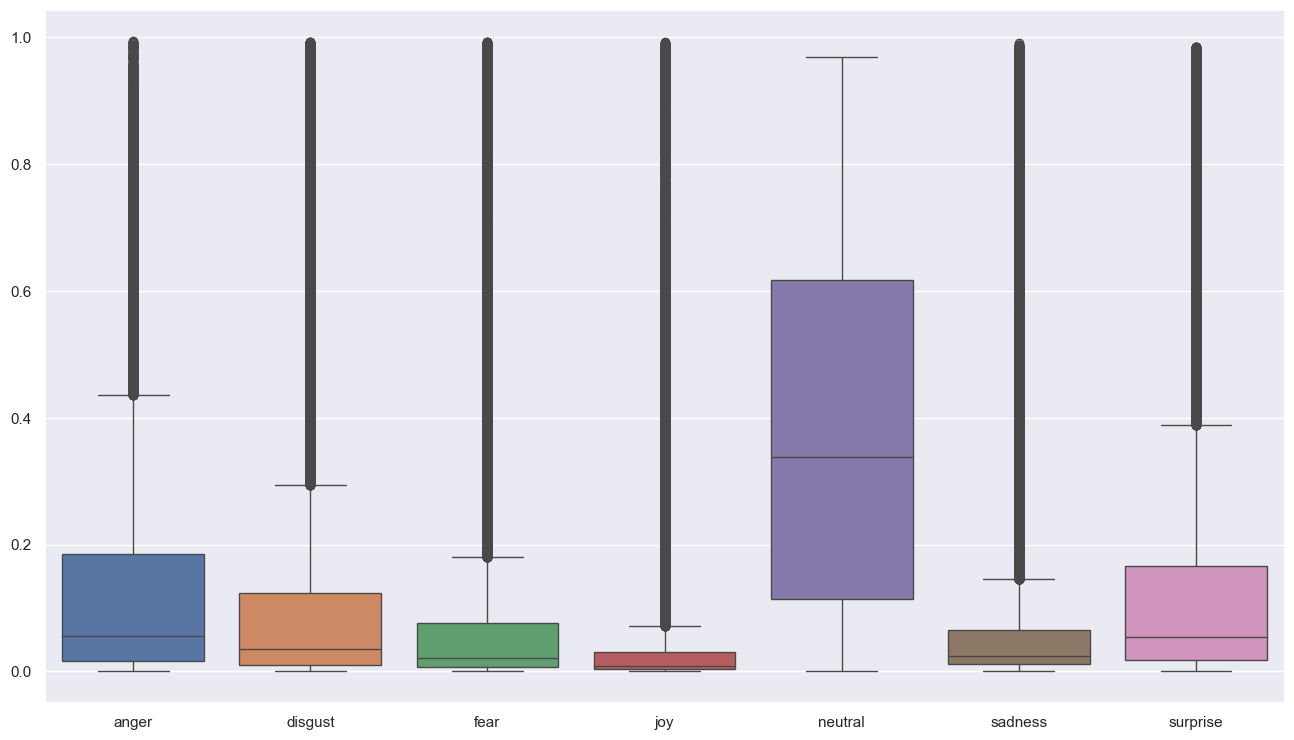

In [34]:
sns.boxplot(data = emotion_stats_df)

In [35]:
entity_emotion_divergence = {}


for k, v in entity_emotion.items():
    if len(v) < 2:
        continue

    simmilarity_of_all_pairs = []

    for i in range(len(v)):
        for j in range(i + 1, len(v)):
            simmilarity_of_all_pairs.append(
                np.dot(v[i], v[j]) / (np.linalg.norm(v[i]) * np.linalg.norm(v[j]))
            )

    entity_emotion_divergence[k] = float(np.mean(simmilarity_of_all_pairs))

In [36]:
sorted_entity_emotion_divergence = sorted(
    entity_emotion_divergence.items(),
    key=lambda x: x[1],
    reverse=True
)

In [37]:
sorted_divergence = list(
    map(
        lambda x: x[1],
        sorted_entity_emotion_divergence
    )
)

<Axes: ylabel='Count'>

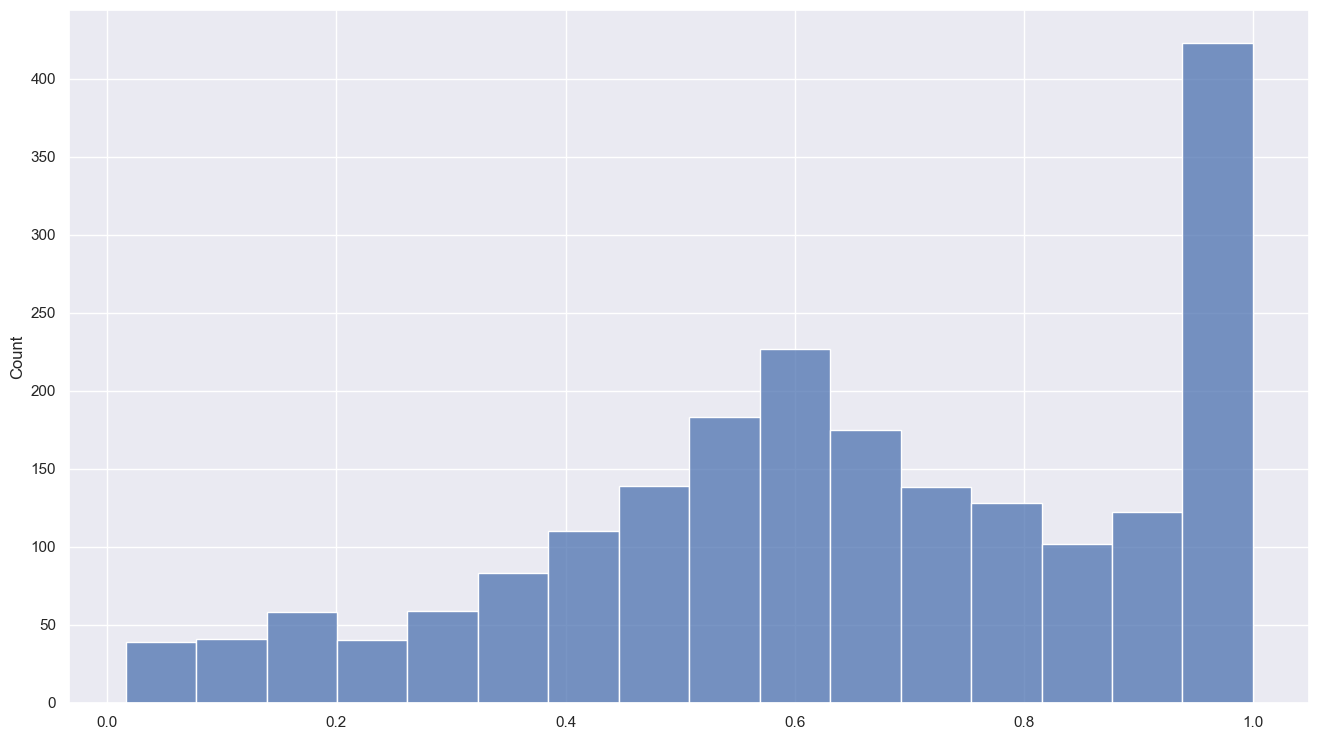

In [38]:
sns.histplot(x=sorted_divergence)

In [39]:
len(sorted_divergence)

2067

In [43]:
ranged_entities = list(reversed(sorted_entity_emotion_divergence))

In [44]:
problematic_entities = pd.DataFrame(ranged_entities, columns=['word', 'score'])

In [45]:
problematic_entities.describe()

,score
count,2067.000000
mean,0.653243
std,0.256822
min,0.016028
25%,0.488838
50%,0.646348
75%,0.891648
max,1.000000


In [46]:
problematic_entities[problematic_entities["score"] < 0.6]

,word,score
0,Pierce Brown,0.016028
1,Grand Hotel,0.021306
2,religion,0.022099
3,Sudan,0.023236
4,Royal,0.023324
...,...,...
851,US,0.598728
852,Porsche 959,0.599504
853,Andrew Tate,0.599516
854,Tamil Tigers,0.599570


In [41]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality,created_datetime,year,named_entities_json,full_text,emotion_json,named_entities,emotion
0,t3_1fo8hat,"Harini Amarasuriya, feminist and outspoken adv...",t2_hwz7hlpj,682,NaN,t3_1fo8hat,Politics,1.727171e+09,1730036388,False,2024-09-24 16:36:32,2024,"[{""entity_group"": ""PER"", ""score"": 0.9972280859...","Harini Amarasuriya, feminist and outspoken adv...","[{""label"": ""anger"", ""score"": 0.007739213760942...","[{'entity_group': 'PER', 'score': 0.9972280859...","[{'label': 'anger', 'score': 0.007739213760942..."
1,t1_loo1nty,I like the fact I am hearing a lot more Dr in ...,t2_7z9p1u76,203,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,[],"Harini Amarasuriya, feminist and outspoken adv...","[{""label"": ""anger"", ""score"": 0.001830127090215...",[],"[{'label': 'anger', 'score': 0.001830127090215..."
2,t1_loo6dk0,She's an excellent lecturer and very popular w...,t2_88sa0qyh,255,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{""entity_group"": ""ORG"", ""score"": 0.9956748485...","Harini Amarasuriya, feminist and outspoken adv...","[{""label"": ""anger"", ""score"": 0.221613391227912...","[{'entity_group': 'ORG', 'score': 0.9956748485...","[{'label': 'anger', 'score': 0.221613391227912..."
3,t1_loo37mt,From the perspective of a bi-racial child of a...,t2_yhhuya1j4,135,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{""entity_group"": ""LOC"", ""score"": 0.9653402566...","Harini Amarasuriya, feminist and outspoken adv...","[{""label"": ""anger"", ""score"": 0.004419586155563...","[{'entity_group': 'LOC', 'score': 0.9653402566...","[{'label': 'anger', 'score': 0.004419586155563..."
4,t1_loo9jcy,Let's hope we see some change here finally. Pe...,t2_14avw6woy3,35,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False,2024-09-24 16:36:32,2024,"[{""entity_group"": ""MISC"", ""score"": 0.982093334...","Harini Amarasuriya, feminist and outspoken adv...","[{""label"": ""anger"", ""score"": 0.351707130670547...","[{'entity_group': 'MISC', 'score': 0.982093334...","[{'label': 'anger', 'score': 0.351707130670547..."


In [55]:
df["named_entities_json"] = df["named_entities"].apply(
    lambda x: dumps(x, cls=NumpyEncoder)
)

In [56]:
df["emotion_json"] = df["emotion"].apply(
    lambda x: dumps(x, cls=NumpyEncoder)
)

In [ ]:
df.to_csv("ner_emotion_analysis.csv", index=False, columns=[
    "full_name",
    "text_body",
    "author_name",
    "votes",
    "responds_to",
    "parent_submission_name",
    "submission_flair",
    "created_timestamp",
    "parsed_timestamp",
    "controversiality",
    "created_datetime",
    "year",
    "named_entities_json",
    "full_text",
    "emotion_json"
])